<a href="https://colab.research.google.com/github/lucaschang2/Time-Series-Forecast/blob/master/DS_assignmen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Analysis and Time Series Forecasting on Coivd-19 Cases</h1></b><br>
<b>Chang Choon Sheng, Chai Jun Jie, Loke Kai Wai, Ong Lee Jin</b><br>
<i>Faculty of Computing and Information Technology, Tunku Abdul Rahman University College, Kuala Lumpur 53300, Malaysia<br>
changcs-wm17@student.tarc.edu.my<br>
chaijj-wm17@student.tarc.edu.my<br>
lokekw-wm17@student.tarc.edu.my<br>
onglj-wm17@student.tarc.edu.my<br><br></i></center>
<div>
<b>Abtract: </b>In this project, we will use the CRISP-DM process to predict the confirmed cases, deaths cases and recovered cases of Covid-19 using its attributes. The data set will be working with contains information on Covid-19 in each day. For each day, how many confirmed cases, deaths cases and recovered cases on Covid-19 in a country.
</div>





# **A Business Understanding**

---

**Objective**<br>
Coronavirus further transmitted to all the country around the world. The status of the confirmed cases, deaths cases and recovered cases can be determined base on the previous day's information of Covid-19. If we can predict the Covid-19 cases in future, the related party in a country can immediately take an action to deal with it in order to reduce the number of infected cases. In this project we try to answer to the following 2 business questions:<br>


*   Is the confirmed cases keep increasing in the future?
*   Can the status of Covid-19 can be predicted based on the information on previous days with reasonable accuracy?



**Current Situation**

**Inventory of Resources**<br>
The student from Bachelor Degree in Computer Science (Software Engineering) which are Chang Choon Sheng (19WMR09727), Chai Jun Jie (19WMR09724), Loke Kai Wai (19WMR09772) and Ong Lee Jin (19WMR09784) are exploring prediction on the status of the Covid-19. The data is taken from the Github and can be downloaded <a href = "https://github.com/CSSEGISandData/COVID-19"> here </a>. This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).  The software used in developing the supervised learning is Google Colab.



**Requirements, assumptions and constraints**<br>
The project is required to be completed by 11:59 p.m of 13th September 2020. The dataset is accessible by the public, therefore there is no legality issues.

**Risk and Contingencies**<br>
Infection of Covid-19 can be caused of many factors, if the prediction are based on the time series, it will be no accurate with the actual.

**Costs and Benefits**<br>
Can alert the related party in a country get ready to take some actions to prevent the infection of the virus.

**Business Success Criteria**<br>
The achievement of business objective indicates the success in project implementation.

**Data Mining Success Criteria**<br>
The data mining is considered as a success due to high accuracy, low mean squared error, and low root mean squared error.


**Project Plan**<br>
For time series forecast, the time series and the confirmed cases will be get from the csv file and store in a dataframe manually. So, the train test split can be implied. Before the train test split, data understanding and data preprocessing need to undergo in order to avoid invalid value.

**Initial Assessment of Tools and Technique**<br>
The data mining method is statsmodels which provides classes and functions of many different statistical models. The analysis we conducted is time series analysis.

In [192]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.0)


In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# **B Data Understanding**

---

## **Describe Data**<br>
There are 3 different csv file we used in this project such as time_series_covid19_confirmed_global.csv, time_series_covid19_deaths_global.csv, and time_series_covid19_recovered_global.csv. These files are in analyse the worldwide confirmed,deaths, and recovered Covid-19 cases by all the country.Three of the dataset have 234 columns. Confirmed cases and deaths cases have 266 rows and recovered cases has 253 rows. Following is the data type claassification.<br><br>
***Object Type***<br>
"Province/State", "Country/Region"<br><br>
***Float Type***<br>
"Lat" (aka latitude), "Long" (aka longtitude)<br><br>
***Interger Type***<br>
remaining columns which is "1/22/20" until "9/7/2020"<br><br>
***Categorical values***<br>
Nominal values: "Province/State", "Country/Region"<br><br>
***Numerical values***<br>
Interval values: "Lat", "Long"<br>
remaining columns which is "1/22/20" until "9/7/2020"<br><br>
**Missing Values**<br>
As in further investigation, the datadet contains multiple missing values in "Province/State" column<br>
185 missing values in confirmed cases dataset<br>
185 missing values in deaths cases dataset<br>
185 missing values in recovered cases dataset<br>
<br>
**Value validation**<br>
Since this is to the number of confirmed cases, so there must no negative value inside the dataset for the columns of "1/22/20" until "9/7/2020"<br>
As a result, all the value is valid.<br><br>

**X variable**<br>
Time series in confirmed cases dataset<br>
<br>
**Y variable**<br>
Worldwide total confirmed cases<br>



In [195]:
covid_confirmed = pd.read_table('/content/drive/My Drive/Colab Notebooks/time_series_covid19_confirmed_global.csv', index_col=False, sep=',')
covid_deaths = pd.read_table('/content/drive/My Drive/Colab Notebooks/time_series_covid19_deaths_global.csv', index_col=False, sep=',')
covid_recovered = pd.read_table('/content/drive/My Drive/Colab Notebooks/time_series_covid19_recovered_global.csv', index_col=False, sep=',')
print("Checking for null values:\n",covid_confirmed.isnull().sum())
print("Checking for null values:\n",covid_deaths.isnull().sum())
print("Checking for null values:\n",covid_recovered.isnull().sum())
covid_confirmed.info()
covid_deaths.info()
covid_recovered.info()

Checking for null values:
 Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/3/20              0
9/4/20              0
9/5/20              0
9/6/20              0
9/7/20              0
Length: 234, dtype: int64
Checking for null values:
 Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/3/20              0
9/4/20              0
9/5/20              0
9/6/20              0
9/7/20              0
Length: 234, dtype: int64
Checking for null values:
 Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/3/20              0
9/4/20              0
9/5/20              0
9/6/20              0
9/7/20              0
Length: 234, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 234 entries, Province/State to 9/7

In [196]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981


In [197]:
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1200,1210,1223,1231,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52,52,52,52,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,52,54,55,58,59,62,64,67,70,75,78,80,80,80,86,86,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120


In [198]:
covid_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20082,20537,20988,21419,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627,26004,26308,26644,27017,27347,27653,27971,28281,28587,28874,29142,29369,29587,29886,30157,30436,30717,30978,31244,31493,31746,32006,32259,32481,32745,32985
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,806,807,807,807,821,825,825,828,839,839,839,839,839,855,858,863,863,863,869,869,875,875,875,875,875,877,877,893,893,902,902,902,908,908,909,909,928,928,928,934
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,395,437,460,461,476,503,506,520,544,564,567,569,575,577,577,584,628,628,632,667,698,742,804,814,818,877,977,977,1335,1028,1041,1063,1071,1084,1115,1144,1167,1192,1198,1215


In [199]:
print(covid_confirmed.count)
print(covid_deaths.count)
print(covid_recovered.count)

<bound method DataFrame.count of     Province/State      Country/Region        Lat  ...  9/5/20  9/6/20  9/7/20
0              NaN         Afghanistan  33.939110  ...   38324   38398   38494
1              NaN             Albania  41.153300  ...   10102   10255   10406
2              NaN             Algeria  28.033900  ...   46071   46364   46653
3              NaN             Andorra  42.506300  ...    1215    1215    1261
4              NaN              Angola -11.202700  ...    2935    2965    2981
..             ...                 ...        ...  ...     ...     ...     ...
261            NaN  West Bank and Gaza  31.952200  ...   25575   26127   26779
262            NaN      Western Sahara  24.215500  ...      10      10      10
263            NaN               Yemen  15.552727  ...    1983    1987    1989
264            NaN              Zambia -13.133897  ...   12709   12776   12836
265            NaN            Zimbabwe -19.015438  ...    6837    6837    7298

[266 rows x 234 co

In [200]:
covid_confirmed=covid_confirmed.drop(columns='Province/State',axis=1)
covid_deaths=covid_deaths.drop(columns='Province/State',axis=1)
covid_recovered=covid_recovered.drop(columns='Province/State',axis=1)
cols = covid_confirmed.keys()


In [201]:
confirmed = covid_confirmed.loc[:, cols[3]:cols[-1]]
deaths = covid_deaths.loc[:, cols[3]:cols[-1]]
recoveries = covid_recovered.loc[:, cols[3]:cols[-1]]

In [202]:
print("Check for negative value in every columns:")
print(np.array(confirmed.lt(0).any()))
print(np.array(deaths.lt(0).any()))
print(np.array(recoveries.lt(0).any()))


Check for negative value in every columns:
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False F

## Data Preparation

---



All the data excluded Province/State, Country/Region, Lat and Long column are required to use to do the prediction. That data which consists of numbers of confirmed cases, deaths cases and recovered cases from 1/22/2020 to 9/7/2020.

**Data Cleaning**<br>
There have 185 missing values in confirmed cases dataset, 185 missing values in deaths cases dataset and 186 missing values in recovered cases, all the missing values are Province/State, we can use the Country/Region instead of Province/State. Since we just need to use the numbers of confirmed cases but all the data we need have not missing values or negative values, so we no need to do data cleaning.

# **C Data Preprocessing**

After that, we sum up the confirmed cases, deaths cases and recovered cases from the first day until the latest day in the dataset. These data is use to find the total confirmed cases, deaths cases, recovered cases and active cases. After we get these data, we can find the mortality rate and recovered rate.


In [203]:
dates = confirmed.keys()
total_cases = []
total_deaths = []
total_recovered = [] 
total_active = [] 
mortality_rate = []
recovery_rate = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    total_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum*100)
    recovery_rate.append(recovered_sum/confirmed_sum*100)

In [204]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d
daily_cases = daily_increase(total_cases)

In [205]:
adjusted_dates = np.array([i for i in range(len(dates))])


In [206]:
from datetime import datetime
dates
dates_format = []
for i in range(len(dates)):
    dates_format.append(datetime.strptime(dates[i], '%m/%d/%y').strftime('%Y-%m-%d'))
dates_month = []
for i in range(len(dates)):
    dates_month.append(datetime.strptime(dates_format[i], '%Y-%m-%d').strftime('%B'))

# **D Data Visualization**

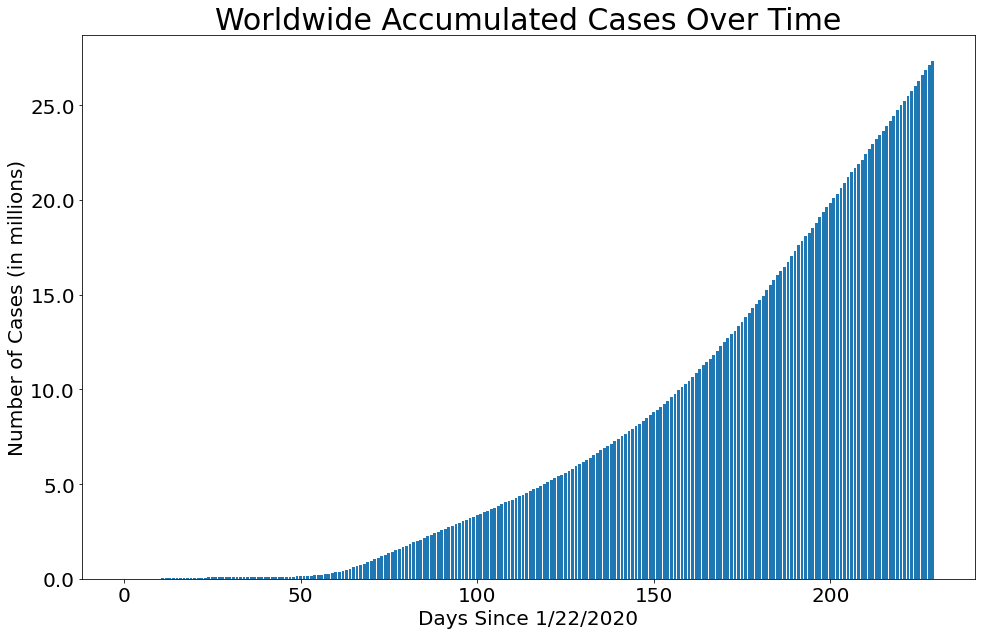

In [207]:
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    return f'{x / 1000000}'

plt.figure(figsize=(16, 10))
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.bar(adjusted_dates, total_cases)
plt.title('Worldwide Accumulated Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


*   The numbers of confirmed cases all around the world are keep increasing day by day since 1/22/2020.


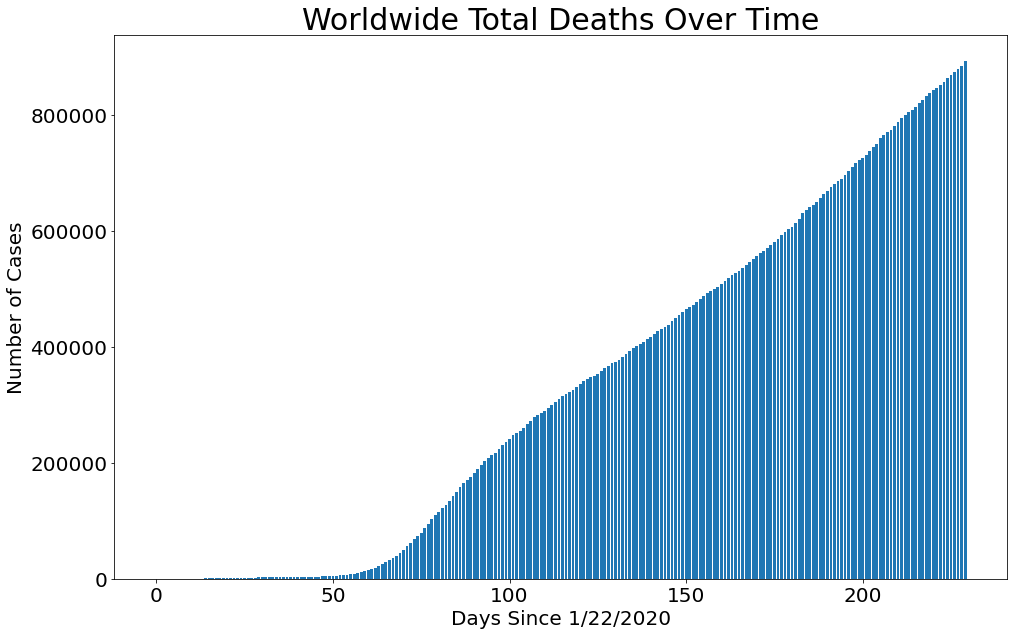

In [208]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, total_deaths)
plt.title('Worldwide Total Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

*   The numbers of deaths cases all around the world are keep increasing day by day since 1/22/2020.


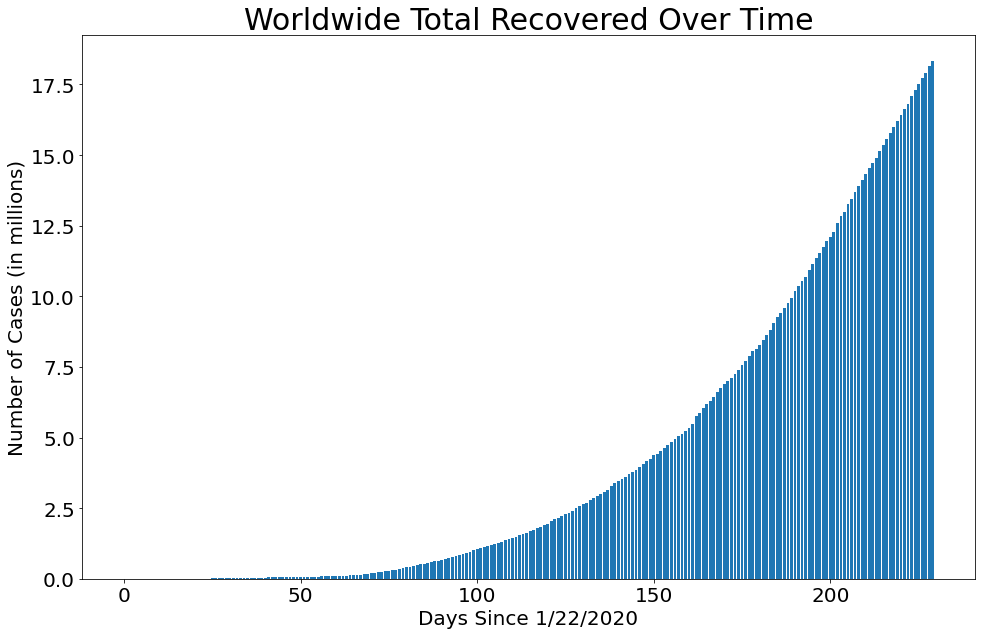

In [209]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, total_recovered)
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Worldwide Total Recovered Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases (in millions)', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

*   The numbers of recovered cases all around the world are keep increasing day by day since 1/22/2020.


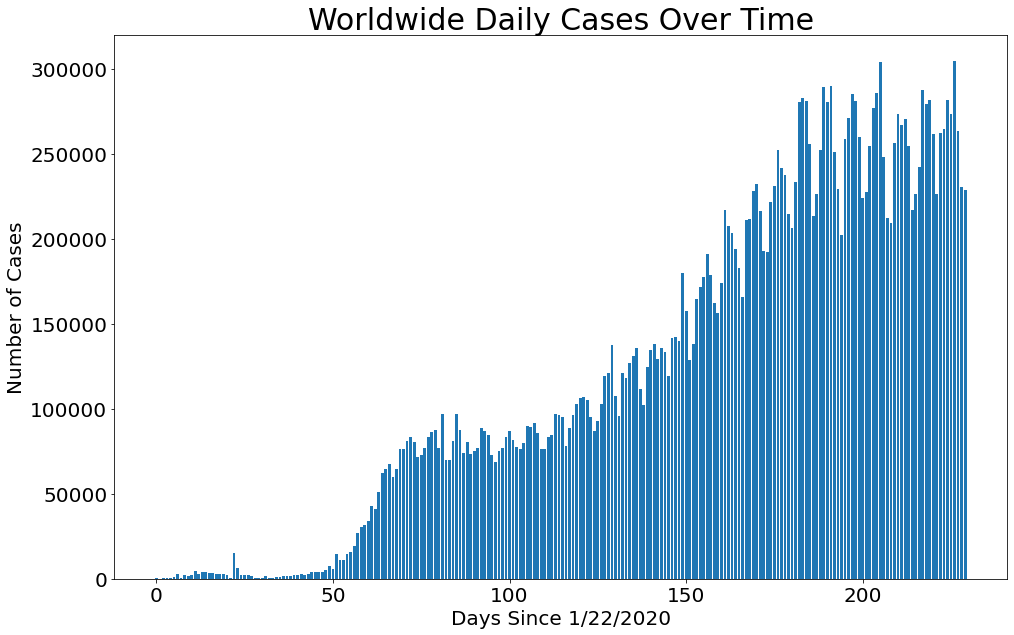

In [210]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, daily_cases)
plt.title('Worldwide Daily Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

*   The daily numbers of cases is floating day by day, increasing suddenly and decrease after a few day.


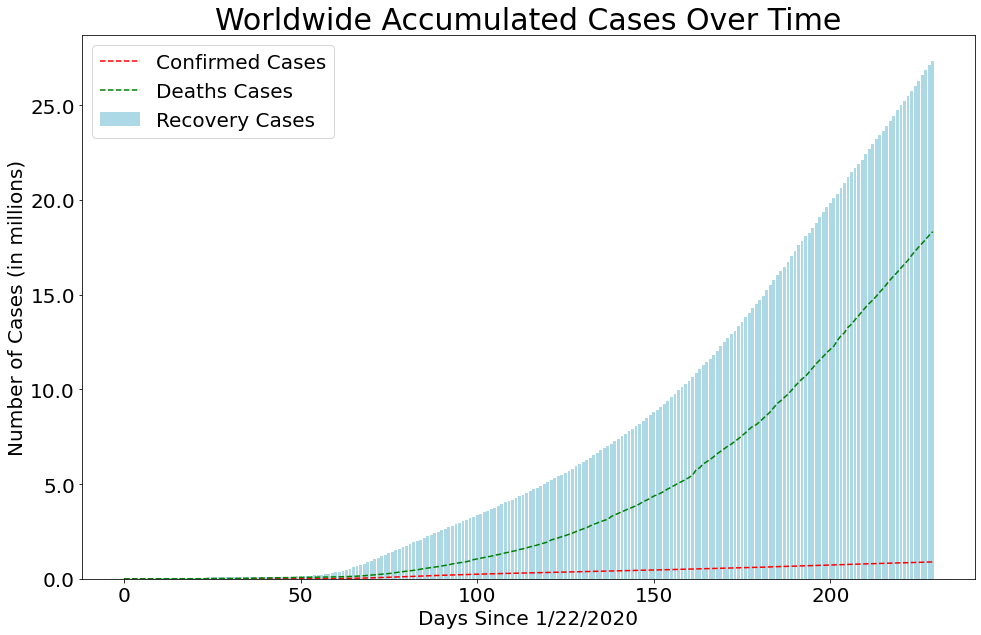

In [211]:
plt.figure(figsize=(16, 10))
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.bar(adjusted_dates, total_cases,color='lightblue')
plt.plot(adjusted_dates, total_deaths,linestyle='dashed', color='red')
plt.plot(adjusted_dates, total_recovered,linestyle='dashed', color='green')
plt.title('Worldwide Accumulated Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Number of Cases (in millions)', size=20)
plt.legend(['Confirmed Cases','Deaths Cases','Recovery Cases'],prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

*   As time goes on, the numbers of recovered cases is slowly pulling away from the numbers of confirmed cases, the ratio between recovered cases and confirmed cases is become bigger and bigger. 
*   But, the numbers of deaths cases also increasing everyday.


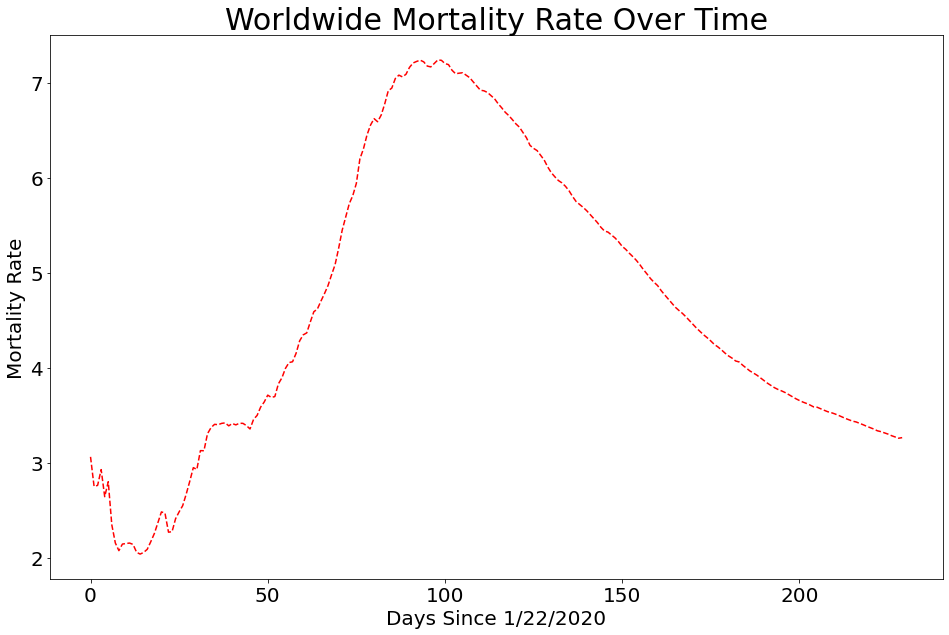

In [212]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate,linestyle='dashed', color='red')
plt.title('Worldwide Mortality Rate Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Mortality Rate', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

*   The mortality rate reach the highest at around 100 days after 1/22/2020 which is about 7% worldwide.


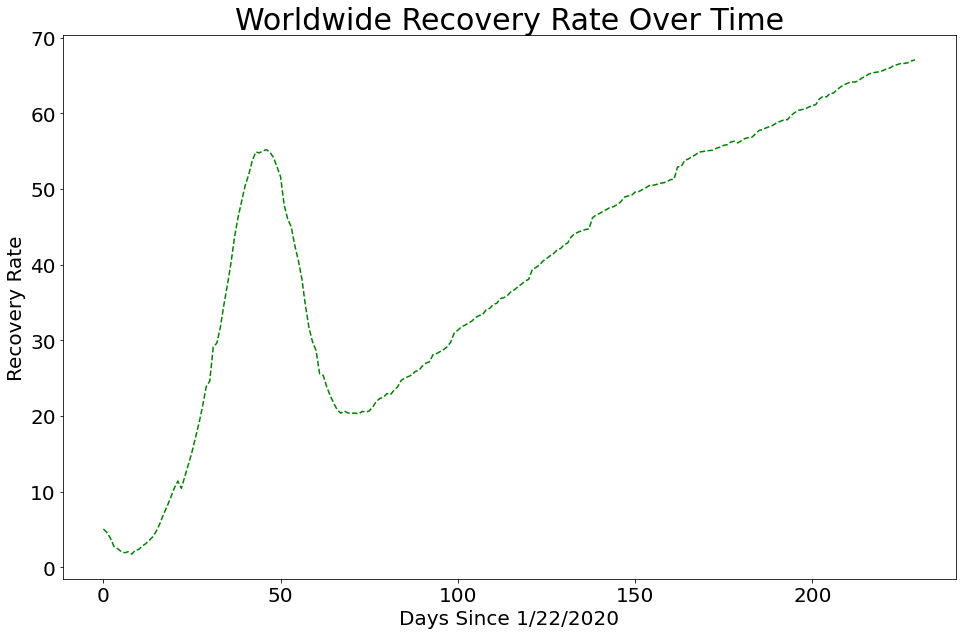

In [213]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, recovery_rate,linestyle='dashed', color='green')
plt.title('Worldwide Recovery Rate Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('Recovery Rate', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

*   The recovery rate is suddenly increase quickly at around 40 days after 1/22/2020 then reduce until 60 days after 1/22/2020. After that, it keep increasing gradually after day 60.


In [214]:
def country_plot(x, y1, y2, y3, y4, country):    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.title('{} Accumulated Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(covid_confirmed[covid_confirmed['Country/Region']==country_name][i].sum())
        country_deaths.append(covid_deaths[covid_deaths['Country/Region']==country_name][i].sum())
        country_recoveries.append(covid_recovered[covid_recovered['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)


In [215]:
get_country= covid_confirmed["Country/Region"]
get_unique= get_country.unique().tolist()

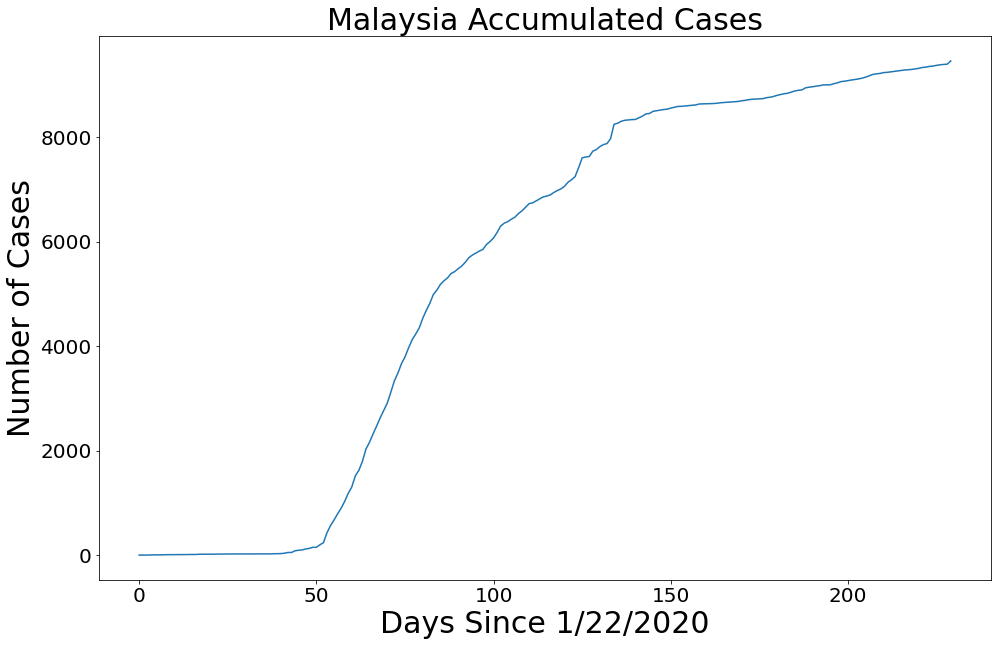

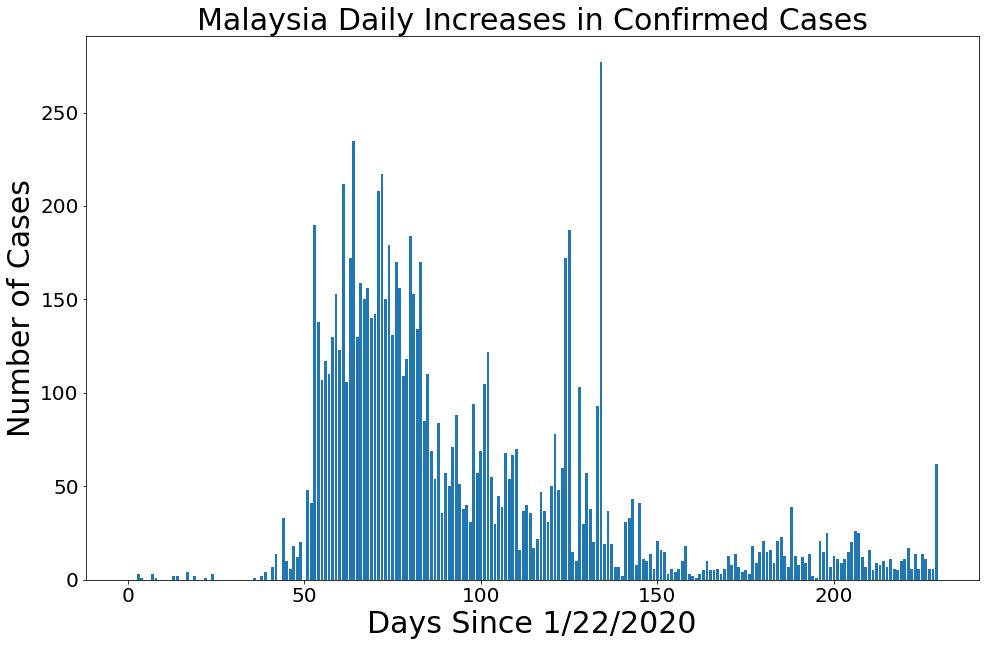

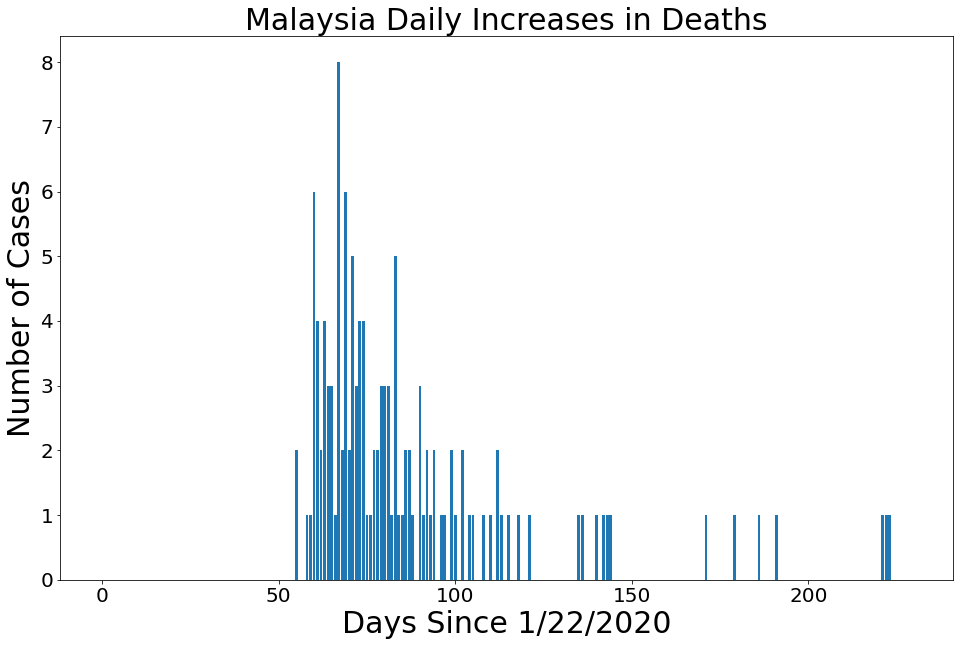

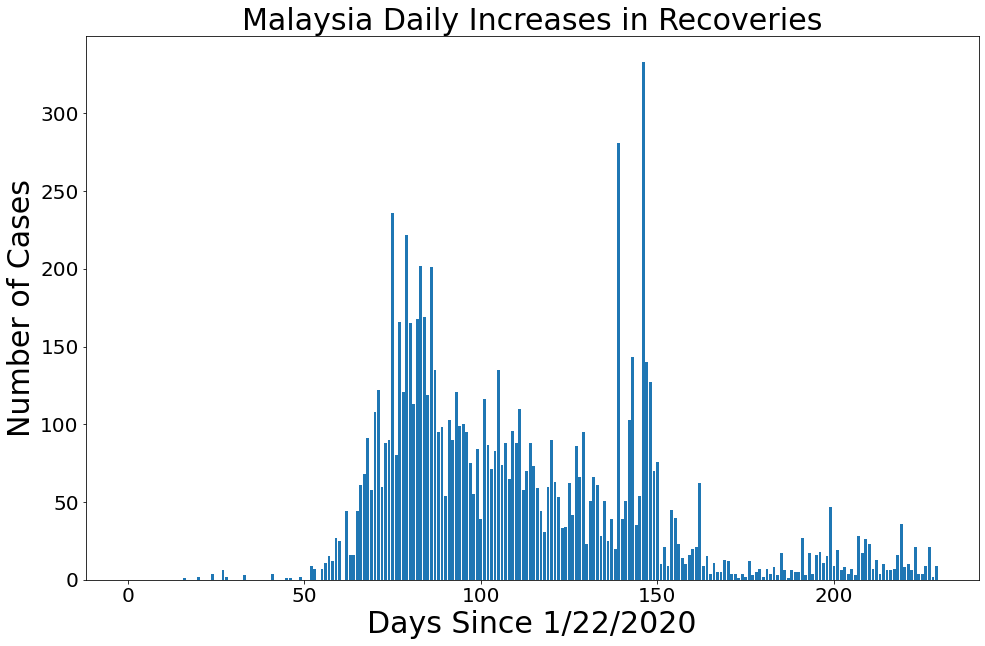

In [216]:
import ipywidgets as widgets
from IPython.display import display, clear_output
select_value= widgets.Dropdown(
    options=get_unique,
    value=get_unique[0],
    description='Country:'
)
def print_value(a):
  clear_output()
  country_visualizations(select_value.value)

display(select_value)
select_value.observe(print_value,names='value')

*   Here we can view the status such as overall confirmed cases, daily numbers of confirmed cases,daily numbers of deaths cases and daily numbers of recovered cases of a selected country.


# **E Data Modeling**
---

**Data Spliting**<br>
The dataset will be split into training and testing sets. The dataset will be used to train and test in this project is only worldwide accumulated connfimed cases. Due to this is time series forecasting. The data spliting will be splited based on the days to be forcasted. The training set is before the last 7 days and the testing set is the last 7 days.<br><br>

**Algorithms Selected**<br>
There are 4 alogrithms selected to model the dataset in order too find the best modeling technique in forecasting the the accumulated confirmed numeber of Covid-19 cases.<br><br>

***1) Autoregression(AR)***<br>
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function.<br><br>

***2) Autoregressive Integrated Moving Average (ARIMA)***<br>
The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function<br><br>

***3) Seasonal Autoregressive Integrated Moving-Average (SARIMA)***<br>
The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period).<br><br>

***4) Holt Winter’s Exponential Smoothing (HWES)***<br>
The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.<br><br>

Before the modeling, we had manually get the time series and the worldwide accumulated number of Covid-19 cases and store them into dataframe for forecating purpose.

In [217]:
#million=[]
#for i in total_cases:
#  million.append(i/1000000)
X_label = np.array([i for i in range(len(dates))]).reshape(-1, 1) #time series
Y_label = np.array(total_cases).reshape(-1, 1) #accumulated cases
#Time series vs acculmulated cases dataframe
df = pd.DataFrame(data=np.column_stack((X_label,total_cases)),columns=['Time Series','Confirmed cases'])
x=df['Time Series']
y=df['Confirmed cases']
df=df.set_index("Time Series")
df.describe()


,Confirmed cases
count,2.300000e+02
mean,7.627611e+06
std,8.177928e+06
min,5.550000e+02
25%,2.532155e+05
50%,4.591366e+06
75%,1.286495e+07
max,2.733243e+07


Base forecast which is shifting the cases before to the cases after 1 days. After the value shifting the first row in "Forecast Accumulated Cases" column will have missing value. So, the first row of the data need to be dropped.

In [218]:
#Forceast base
df_base= pd.concat([df,df.shift(1)],axis=1)
df_base.columns= ["Actual Accumulated Cases", "Forecast Accumulated Cases"]
df_base.dropna(inplace=True)
df.dropna(inplace=True)
df_base.head(5)

,Actual Accumulated Cases,Forecast Accumulated Cases
Time Series,,
1,654,555.0
2,941,654.0
3,1434,941.0
4,2118,1434.0
5,2927,2118.0


In [219]:
len(df_base) #Check for the length of data frame for purpose of train test

229

We can see that train size is 222 days before and the test size is last 7 days.


Root Mean Square Error (RMSE) is 152,657 from the data range of 0 to 27,000,000. That mean the RMSE consider small and has a good score.

In [220]:
from sklearn import metrics
df_error = metrics.mean_squared_error(df_base["Actual Accumulated Cases"],df_base["Forecast Accumulated Cases"])
df_train=df[0:222]
df_test=df[222:229]
print("Train Size:",df_train.size)
print("Test Size:",df_test.size)
print("RMSE:",np.sqrt(df_error)) #RMSE
df_error

Train Size: 222
Test Size: 7
RMSE: 152657.59812296435


23304342264.67249

In [221]:
#calculate score function
def forecast_accuracy(forecast, actual):
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
  mae = metrics.mean_absolute_error(actual,forecast)  # MAE
  mse = metrics.mean_squared_error(actual,forecast)  # MSE
  rmse = np.sqrt(metrics.mean_squared_error(actual,forecast))  # RMSE  
  return(mape, mae, mse, rmse)

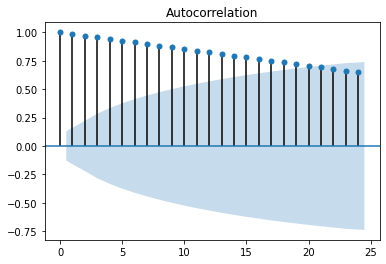

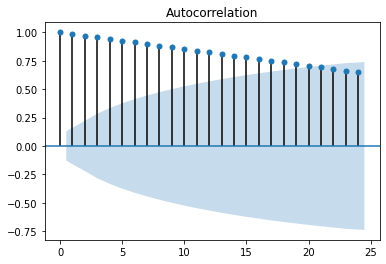

In [222]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df) #q parameter for ARIMA

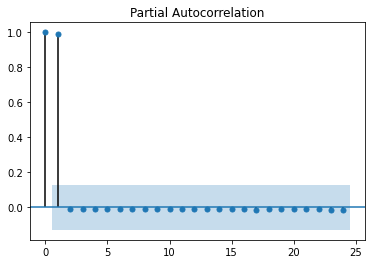

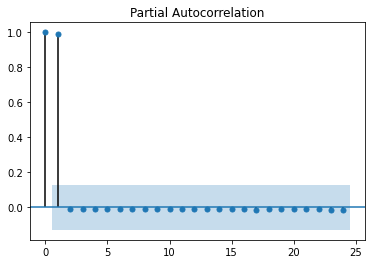

In [223]:
plot_pacf(df)#p parameter for ARIMA

## **ARIMA Model**

In [224]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(df_train, order=(1,1,2))  
arima_fit = arima.fit()
arima_forecast = arima_fit.forecast(steps=7)[0] #forecast last 7 days


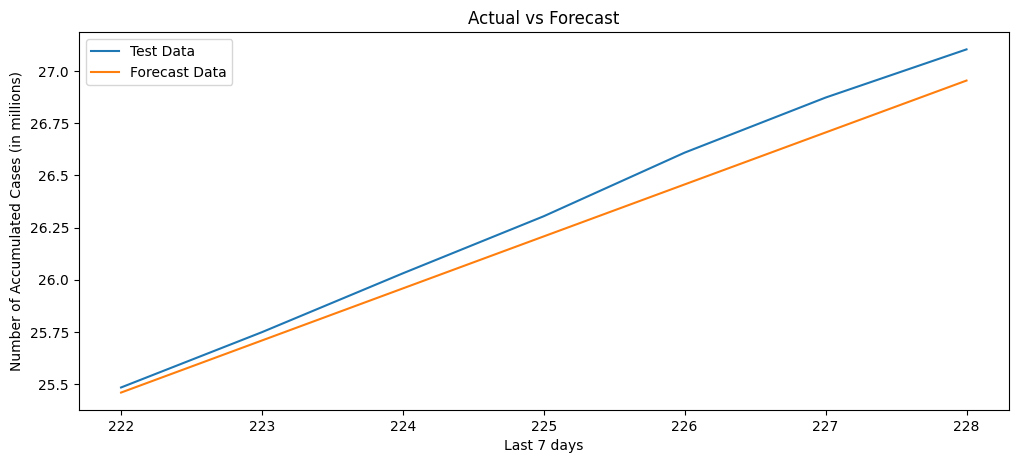

In [225]:
fc_series = pd.Series(arima_forecast, index=df_test.index)
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(df_train, label='training')
plt.title('Actual vs Forecast')
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.plot(df_test, label='Test Data')
plt.plot(fc_series, label='Forecast Data')
plt.xlabel('Last 7 days')
plt.ylabel('Number of Accumulated Cases (in millions)')
plt.legend(loc='upper left', fontsize=8,prop={'size': 10})
plt.show()

In [226]:
mape_score=[]
mae_score=[]
mse_score=[]
rmse_score=[]
arima_acc= forecast_accuracy(arima_forecast, df_test.values)
mape_score.append(arima_acc[0])
mae_score.append(arima_acc[1])
mse_score.append(arima_acc[2])
rmse_score.append(arima_acc[3])
print("MAPE:",arima_acc[0])
print("MAE:",arima_acc[1])
print("MSE:",arima_acc[2])
print("RMSE:",arima_acc[3])
print(arima_fit.summary())

MAPE: 0.023247139549390873
MAE: 100238.8065166319
MSE: 12875408352.955353
RMSE: 113469.8565829505
                             ARIMA Model Results                              
Dep. Variable:      D.Confirmed cases   No. Observations:                  221
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2434.347
Method:                       css-mle   S.D. of innovations          14555.166
Date:                Sun, 13 Sep 2020   AIC                           4878.694
Time:                        12:23:39   BIC                           4895.685
Sample:                             1   HQIC                          4885.554
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.141e+05   1.12e+05      1.023      0.306   -1.05e+05    3.3

## **Autoregression Model**

In [227]:
from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(df_train, lags=1)
ar_fit = ar.fit()
ar_fc = ar_fit.forecast(steps=7)
ar_fc_arr= np.array(ar_fc)

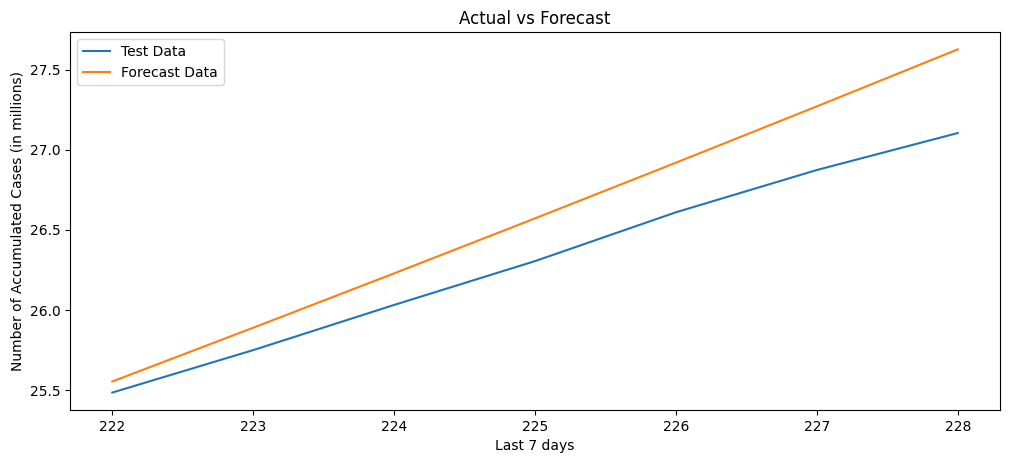

In [228]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(df_train, label='training')
plt.title('Actual vs Forecast')
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.plot(df_test, label='Test Data')
plt.plot(ar_fc, label='Forecast Data')
plt.xlabel('Last 7 days')
plt.ylabel('Number of Accumulated Cases (in millions)')
plt.legend(loc='upper left', fontsize=8,prop={'size': 10})
plt.show()


In [229]:
ar_acc= forecast_accuracy(ar_fc_arr, df_test.values)
mape_score.append(ar_acc[0])
mae_score.append(ar_acc[1])
mse_score.append(ar_acc[2])
rmse_score.append(ar_acc[3])
print("MAPE:",ar_acc[0])
print("MAE:",ar_acc[1])
print("MSE:",ar_acc[2])
print("RMSE:",ar_acc[3])
print(ar_fit.summary())

MAPE: 0.02883584135948375
MAE: 271538.796256994
MSE: 94271667028.91731
RMSE: 307036.91476582637
                            AutoReg Model Results                             
Dep. Variable:        Confirmed cases   No. Observations:                  222
Model:                     AutoReg(1)   Log Likelihood               -2598.621
Method:               Conditional MLE   S.D. of innovations          30931.351
Date:                Sun, 13 Sep 2020   AIC                             20.706
Time:                        12:23:39   BIC                             20.752
Sample:                             1   HQIC                            20.725
                                  222                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept           3.288e+04   2841.667     11.571      0.000    2.73e+04    3.85e+04
Confirmed c

## **SARIMA Model**

Quarterly seasonal month train data

In [230]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(df_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 4))
sarima_fit = sarima.fit()
sarima_fc = sarima_fit.forecast(len(df_test))
sarima_fc_arr=np.array(sarima_fc)

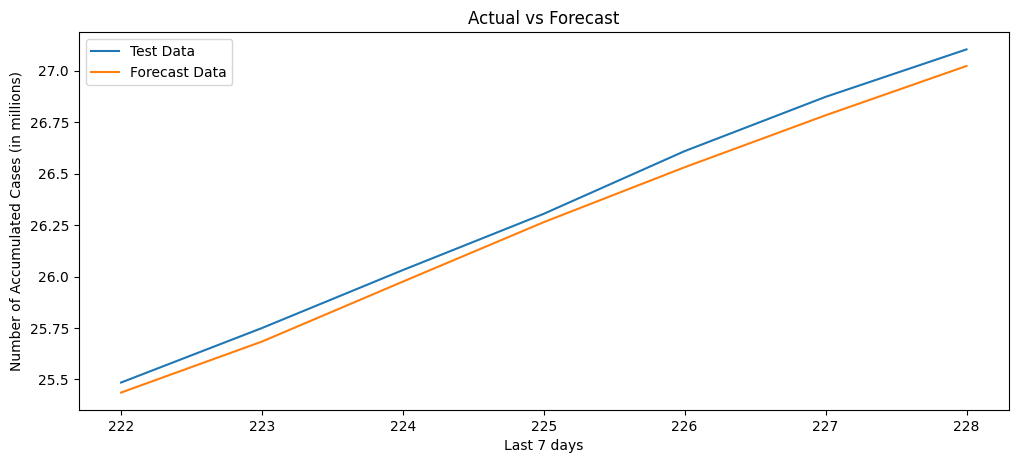

In [231]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(df_train, label='training')
plt.title('Actual vs Forecast')
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.plot(df_test, label='Test Data')
plt.plot(sarima_fc, label='Forecast Data')
plt.xlabel('Last 7 days')
plt.ylabel('Number of Accumulated Cases (in millions)')
plt.legend(loc='upper left', fontsize=8,prop={'size': 10})
plt.show()

In [232]:
sarima_acc= forecast_accuracy(sarima_fc_arr, df_test.values)
mape_score.append(sarima_acc[0])
mae_score.append(sarima_acc[1])
mse_score.append(sarima_acc[2])
rmse_score.append(sarima_acc[3])
print("MAPE:",sarima_acc[0])
print("MAE:",sarima_acc[1])
print("MSE:",sarima_acc[2])
print("RMSE:",sarima_acc[3])
print(sarima_fit.summary())

MAPE: 0.023924962571862676
MAE: 65685.29898051066
MSE: 4595139220.00853
RMSE: 67787.45621432131
                                      SARIMAX Results                                      
Dep. Variable:                     Confirmed cases   No. Observations:                  222
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 4)   Log Likelihood               -2339.570
Date:                             Sun, 13 Sep 2020   AIC                           4693.141
Time:                                     12:23:41   BIC                           4716.800
Sample:                                          0   HQIC                          4702.698
                                             - 222                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1     

## **HWES Model**

Weekly seasonal train data

In [233]:
from statsmodels.tsa.api import ExponentialSmoothing
es = ExponentialSmoothing(df_train,seasonal_periods=7,trend='add', seasonal='mul')
es_fit = es.fit()
es_fc = es_fit.forecast(steps=7)
es_fc_arr = np.array(es_fc)

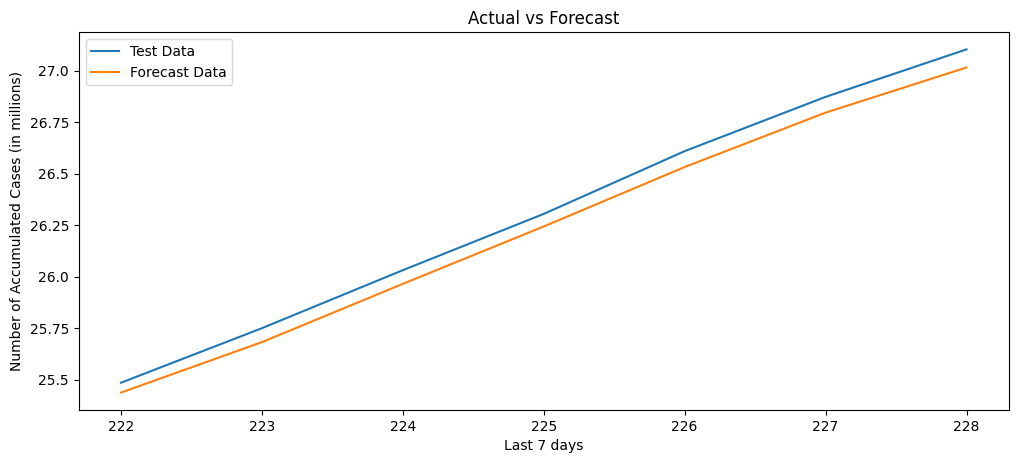

In [234]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(df_train, label='training')
plt.title('Actual vs Forecast')
axes = plt.gca()
axes.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.plot(df_test, label='Test Data')
plt.plot(es_fc, label='Forecast Data')
plt.xlabel('Last 7 days')
plt.ylabel('Number of Accumulated Cases (in millions)')
plt.legend(loc='upper left', fontsize=8,prop={'size': 10})
plt.show()

In [235]:
es_acc= forecast_accuracy(es_fc_arr, df_test.values)
mape_score.append(es_acc[0])
mae_score.append(es_acc[1])
mse_score.append(es_acc[2])
rmse_score.append(es_acc[3])
print("MAPE:",es_acc[0])
print("MAE:",es_acc[1])
print("MSE:",es_acc[2])
print("RMSE:",es_acc[3])
print(es_fit.summary())

MAPE: 0.023969120901841258
MAE: 69289.52535521185
MSE: 4943987522.198325
RMSE: 70313.49459526475
                       ExponentialSmoothing Model Results                       
Dep. Variable:          Confirmed cases   No. Observations:                  222
Model:             ExponentialSmoothing   SSE                    97387654862.703
Optimized:                         True   AIC                           4439.642
Trend:                         Additive   BIC                           4477.071
Seasonal:                Multiplicative   AICC                          4441.392
Seasonal Periods:                     7   Date:                 Sun, 13 Sep 2020
Box-Cox:                          False   Time:                         12:23:41
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_

# **F Evaluation**

---



**Mean Abslute Percentage Error (MAPE)**<br>
MAPE is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning.<br><br>
**Mean Abslute Error (MAE)**<br>
MAE is a measure of errors between paired observations expressing the same phenomenon.<br><br>
**Mean Squared Error (MSE)**<br>
MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables<br><br>
**Root Mean Squared Error (RMSE)**<br>
RMSE is a quadratic scoring rule which measures the average magnitude of the error. RMSE gives a relatively high weight to large errors.<br>

## **Summarization of Forecasts using different Models**

In [236]:
model_names=["Autoregressive Integrated Moving Average","Autoregressive",
             "Seasonal Autoregressive Integrated Moving Average","Holt Winter’s Exponential Smoothing"]
model_summary=pd.DataFrame(zip(model_names,mape_score,mae_score,mse_score,rmse_score),columns=["Model Name",
                                                                                               "Mean Absolute Percentage Error",
                                                                                               "Mean Absolute Error",
                                                                                               "Mean Squared Error",
                                                                                               "Root Mean Squared Error"])
print("Model Summary:")
model_summary

Model Summary:


,Model Name,Mean Absolute Percentage Error,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Autoregressive Integrated Moving Average,0.023247,100238.806517,1.287541e+10,113469.856583
1,Autoregressive,0.028836,271538.796257,9.427167e+10,307036.914766
2,Seasonal Autoregressive Integrated Moving Average,0.023925,65685.298981,4.595139e+09,67787.456214
3,Holt Winter’s Exponential Smoothing,0.023969,69289.525355,4.943988e+09,70313.494595


## **Assessment of data mining results**

From the summary table shown, the Mean Absolute Percentage Error is 0.02 for all models which mean all the models have 98% of accuracy in predicting the next 7 days. All the Root Mean Square Error is consider small in the range of 0 to 27,000,000.

For the comparison, SARIMA model is the best model in this case due to the low MAPE and lowest RMSE. And the lowest MAPE is ARIMA model. However Autoregression has the highest RMSE which is up until 307,036.91. But the RMSE in this case is consider as small too. Just to clarify that Autoregressive has low accurate compare to other models.

Besides, when see the value of mean square error all the results shown is more than billion. But the data range in this case is 0 to 27,000,000. When all the data range in divided by 1 million. Then the MSE will as small as 0.04 for SARIMA model.

# **G Deployment**

---



**Result**

As the values of RME for SARIMA model is lowest but the value of MAPE is slightly higher than ARIMA. But RMSE in ARIMA is higher.So, SARIMA will be chosen in implemetation.

**Further Improvement**

For ARIMA and SARIMA model, there is the order value such as order of differencing, order of the AR term, order of the MA term. And SARIMA model has seasonal order and seasonal periodity. So the improvement can be made is automate the ordering to find the best parameter for forecasting.<br>
Besides, the new technique likes curve fitting can be used to test the prediction result in this case. <br>
Furthermore, forecasting on more cases can be improve such as forecast daily cases by every country or worldwide.

# **H Conclusion**

---



**Autoregressive such as AR, ARIMA, SARIMA**

Pros<br>
*   Suitable for non-stationary time series, stable, high accuracy of forecast
*   Better understand the time series pattern
*   Being able to changes in trend and seasonal pattern

Cons<br>
*   Unable to respond immediately with a certain lag
*   Hard to use

**Holt Winter’s Exponential Smoothing**

Pros<br>
*   Used for short term forecast
*   Easy to understand
*   Easy to implement
*   Being able to changes in trend and seasonal pattern

Cons<br>
*   Only univariante data forecasts
*   Accounts only for single seasonal pattern



# **I References**

Brownlee, J., 2017. Time Series Forecasting Performance Measures With Python. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/> [Accessed 11 September 2020].

Brownlee, J., 2020. How To Create An ARIMA Model For Time Series Forecasting In Python. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/> [Accessed 11 September 2020].

Fallah, Seyedeh & Ganjkhani, Mehdi & Shamshirband PhD, & Chau, Kwok-Wing. (2019). Computational Intelligence on Short-Term Load Forecasting: A Methodological Overview. Energies. 12. 393. 10.3390/en12030393. 

Khandelwal, 2020. Time Series FORECASTING. [online] Slideshare.net. Available at: <https://www.slideshare.net/VarunKhandelwal2/time-series-forecasting-49297788> [Accessed 11 September 2020].

Medium. 2018. Time Series Forecasting — ARIMA Models. [online] Available at: <https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06> [Accessed 11 September 2020].

Prabhakaran, S., 2020. ARIMA Model - Complete Guide To Time Series Forecasting In Python | ML+. [online] Machine Learning Plus. Available at: <https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/#:~:text=ARIMA%2C%20short%20for%20'Auto%20Regressive,used%20to%20forecast%20future%20values.> [Accessed 11 September 2020].
